In [1]:
import requests
import pandas as pd
import numpy as np
import re
import time
import random

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import itertools

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

### 3.01 - API Scraping

In [2]:
url = 'https://www.reddit.com/r/nosleep.json'
res = requests.get(url, headers={'User-agent': 'Mozilla/4.0'})

In [3]:
res.status_code

200

In [4]:
dict1 = res.json()
dict1.keys()

dict_keys(['kind', 'data'])

In [5]:
dict1['kind']

'Listing'

In [6]:
dict1['data'].keys()

dict_keys(['modhash', 'dist', 'children', 'after', 'before'])

In [7]:
dict1['data']['children']

[{'kind': 't3',
  'data': {'approved_at_utc': None,
   'subreddit': 'nosleep',
   'selftext': '',
   'author_fullname': 't2_e02l6',
   'saved': False,
   'mod_reason_title': None,
   'gilded': 0,
   'clicked': False,
   'title': 'Rule changes for r/nosleep and r/nosleepOOC',
   'link_flair_richtext': [],
   'subreddit_name_prefixed': 'r/nosleep',
   'hidden': False,
   'pwls': 6,
   'link_flair_css_class': None,
   'downs': 0,
   'hide_score': False,
   'name': 't3_c1rg0e',
   'quarantine': False,
   'link_flair_text_color': 'dark',
   'author_flair_background_color': None,
   'subreddit_type': 'public',
   'ups': 58,
   'total_awards_received': 0,
   'media_embed': {},
   'author_flair_template_id': None,
   'is_original_content': False,
   'user_reports': [],
   'secure_media': None,
   'is_reddit_media_domain': False,
   'is_meta': False,
   'category': None,
   'secure_media_embed': {},
   'link_flair_text': None,
   'can_mod_post': False,
   'score': 58,
   'approved_by': None,
  

In [8]:
len(dict1['data']['children'])

27

In [9]:
dict1['data']['children'][0]['data']['title']

'Rule changes for r/nosleep and r/nosleepOOC'

In [10]:
dict1['data']['children'][0]['data']['selftext']

''

In [11]:
posts1 = [p['data'] for p in dict1['data']['children']] 
pd.DataFrame(posts1)

,all_awardings,approved_at_utc,approved_by,archived,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,thumbnail,title,total_awards_received,ups,url,user_reports,view_count,visited,whitelist_status,wls
0,[],None,None,False,cmd102,None,None,[],None,None,...,,Rule changes for r/nosleep and r/nosleepOOC,0,58,https://www.reddit.com/r/NoSleepOOC/comments/c...,[],None,False,all_ads,6
1,[],None,None,False,EtTuTortilla,None,None,[],0637253e-f26a-11e2-acf7-12313b0eb082,Contests and -30- Press,...,,May Contest Nominations,0,31,https://old.reddit.com/r/NoSleepOOC/comments/c...,[],None,False,all_ads,6
2,[],None,None,False,hohth,None,None,[],None,None,...,,Everyone Died In 2011,0,1574,https://www.reddit.com/r/nosleep/comments/c2s1...,[],None,False,all_ads,6
3,[],None,None,False,nslewis,None,None,[],None,None,...,,Our star player is on the field right now kill...,0,160,https://www.reddit.com/r/nosleep/comments/c2ux...,[],None,False,all_ads,6
4,"[{'is_enabled': True, 'count': 3, 'subreddit_i...",None,None,False,crimzonprizm,None,None,[],None,None,...,,Did you get the alert?,3,3184,https://www.reddit.com/r/nosleep/comments/c2l8...,[],None,False,all_ads,6
5,"[{'is_enabled': True, 'count': 1, 'subreddit_i...",None,None,False,BPWrites,None,None,[],None,None,...,,The Most Beautiful Girl I've Never Seen,1,1170,https://www.reddit.com/r/nosleep/comments/c2o1...,[],None,False,all_ads,6
6,[],None,None,False,hyperobscura,None,None,[],None,None,...,,My new neighbor always seems to have blood on ...,0,902,https://www.reddit.com/r/nosleep/comments/c2lh...,[],None,False,all_ads,6
7,[],None,None,False,WritingAmbition,None,None,[],None,None,...,,We thought there was something haunting our ba...,0,474,https://www.reddit.com/r/nosleep/comments/c2np...,[],None,False,all_ads,6
8,"[{'is_enabled': True, 'count': 1, 'subreddit_i...",None,None,False,samhaysom,None,None,[],None,None,...,,I keep seeing hidden messages whenever I check...,3,3646,https://www.reddit.com/r/nosleep/comments/c2g4...,[],None,False,all_ads,6
9,"[{'is_enabled': True, 'count': 1, 'subreddit_i...",None,None,False,Zithero,None,None,[],None,None,...,,"Since the first time I died, I've fallen in lo...",1,120,https://www.reddit.com/r/nosleep/comments/c2r9...,[],None,False,all_ads,6


In [12]:
dict1['data']['after']

't3_c2mgk3'

In [13]:
pd.DataFrame(posts1)['name']

0     t3_c1rg0e
1     t3_c1ufnj
2     t3_c2s13p
3     t3_c2uxyo
4     t3_c2l80b
5     t3_c2o1ju
6     t3_c2lhm5
7     t3_c2npsm
8     t3_c2g4dz
9     t3_c2r9ip
10    t3_c2lmq4
11    t3_c2oo12
12    t3_c2p1js
13    t3_c2szpt
14    t3_c2us6b
15    t3_c2sx84
16    t3_c2rgr2
17    t3_c2lkju
18    t3_c2ux4a
19    t3_c2wkjq
20    t3_c2tj0q
21    t3_c2j58b
22    t3_c2q1gg
23    t3_c2kbyo
24    t3_c2c2c5
25    t3_c2q6cq
26    t3_c2mgk3
Name: name, dtype: object

In [14]:
url + '?after=' + dict1['data']['after']

'https://www.reddit.com/r/nosleep.json?after=t3_c2mgk3'

In [15]:
len(posts1)

27

In [16]:
posts1 = []
after = None

for a in range(35):
    if after == None:
        current_url = url
    else:
        current_url = url + '?after=' + after
    print(current_url)
    res = requests.get(current_url, headers={'User-agent': 'Mozilla/4.0'})
    
    if res.status_code != 200:
        print('Status error', res.status_code)
        break
    
    current_dict = res.json()
    current_posts = [p['data'] for p in current_dict['data']['children']]
    posts1.extend(current_posts)
    after = current_dict['data']['after']
    
    if a > 0:
        prev_posts = pd.read_csv('nosleep.csv')  
        current_df = pd.DataFrame(posts1) 
        
    else:
        pd.DataFrame(posts1).to_csv('nosleep.csv', index = False) 
       
    sleep_duration = random.randint(5,30)
    print(sleep_duration)
    time.sleep(sleep_duration)

https://www.reddit.com/r/nosleep.json
10
https://www.reddit.com/r/nosleep.json?after=t3_c2mgk3
28
https://www.reddit.com/r/nosleep.json?after=t3_c2wete
14
https://www.reddit.com/r/nosleep.json?after=t3_c2r07r
30
https://www.reddit.com/r/nosleep.json?after=t3_c2dql9
6
https://www.reddit.com/r/nosleep.json?after=t3_c27plp
5
https://www.reddit.com/r/nosleep.json?after=t3_c27zm4
7
https://www.reddit.com/r/nosleep.json?after=t3_c2clr8
30
https://www.reddit.com/r/nosleep.json?after=t3_c27qy5
22
https://www.reddit.com/r/nosleep.json?after=t3_c1iu6h
22
https://www.reddit.com/r/nosleep.json?after=t3_c1p7tw
19
https://www.reddit.com/r/nosleep.json?after=t3_c1dmav
17
https://www.reddit.com/r/nosleep.json?after=t3_c1ce5e
6
https://www.reddit.com/r/nosleep.json?after=t3_c1hmr2
19
https://www.reddit.com/r/nosleep.json?after=t3_c111x3
11
https://www.reddit.com/r/nosleep.json?after=t3_c126e0
17
https://www.reddit.com/r/nosleep.json?after=t3_c0nwxh
9
https://www.reddit.com/r/nosleep.json?after=t3_c0na4

In [17]:
pd.DataFrame(posts1).to_csv('nosleep_posts.csv') 

In [18]:
len(posts1)

871

In [19]:
url1 = 'https://www.reddit.com/r/Anxiety.json'
res = requests.get(url1, headers={'User-agent': 'Mozilla/4.0'})

In [20]:
dict2 = res.json()
dict2.keys()

dict_keys(['kind', 'data'])

In [21]:
posts2 = [p['data'] for p in dict2['data']['children']] 

In [22]:
pd.DataFrame(posts2)

,all_awardings,approved_at_utc,approved_by,archived,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,thumbnail_width,title,total_awards_received,ups,url,user_reports,view_count,visited,whitelist_status,wls
0,[],None,None,False,Pi25,None,None,[],a45950f4-fac1-11e0-ad91-12313d096aae,wild pikachu,...,None,CBD Megathread (June 2019),0,26,https://www.reddit.com/r/Anxiety/comments/byqx...,[],None,False,house_only,1
1,[],None,None,False,AutoModerator,,None,[],None,Paranoid Robot,...,None,"Wednesday Wins - June 19, 2019",0,2,https://www.reddit.com/r/Anxiety/comments/c2g7...,[],None,False,house_only,1
2,[],None,None,False,hemismum,None,None,[],None,None,...,None,I take my hat off to people who experience anx...,0,1058,https://www.reddit.com/r/Anxiety/comments/c2nh...,[],None,False,house_only,1
3,[],None,None,False,weedislif,None,None,[],None,None,...,None,anyone else turn up super early to most social...,0,6,https://www.reddit.com/r/Anxiety/comments/c2wp...,[],None,False,house_only,1
4,[],None,None,False,shazziewagtails,None,None,[],None,None,...,None,Angerxiety?,0,175,https://www.reddit.com/r/Anxiety/comments/c2lz...,[],None,False,house_only,1
5,[],None,None,False,pecan_dandies,None,None,[],None,None,...,None,Finally scheduled a therapy appointment. It’s ...,0,7,https://www.reddit.com/r/Anxiety/comments/c2vl...,[],None,False,house_only,1
6,[],None,None,False,ladymoro95,None,None,[],None,None,...,None,Sleeping with a stuffed animal.,0,23,https://www.reddit.com/r/Anxiety/comments/c2sk...,[],None,False,house_only,1
7,"[{'is_enabled': True, 'count': 1, 'subreddit_i...",None,None,False,OneWaterPlease,None,None,[],None,None,...,None,Calling in sick gives me massive amounts of an...,1,682,https://www.reddit.com/r/Anxiety/comments/c2g2...,[],None,False,house_only,1
8,[],None,None,False,Captain-Brooke,None,None,[],None,None,...,None,Over thinker!,0,17,https://www.reddit.com/r/Anxiety/comments/c2t0...,[],None,False,house_only,1
9,[],None,None,False,mysterytea,None,None,[],None,None,...,None,DAE doctor write symptoms off as anxiety?,0,3,https://www.reddit.com/r/Anxiety/comments/c2w7...,[],None,False,house_only,1


In [23]:
url1 + '?after=' + dict2['data']['after'] 

'https://www.reddit.com/r/Anxiety.json?after=t3_c2t9qe'

In [24]:
posts2 = []
after = None

for a in range(35):
    if after == None:
        current_url = url1
    else:
        current_url = url1 + '?after=' + after
    print(current_url)
    res = requests.get(current_url, headers={'User-agent': 'Mozilla/4.0'})
    
    if res.status_code != 200:
        print('Status error', res.status_code)
        break
    
    current_dict = res.json()
    current_posts = [p['data'] for p in current_dict['data']['children']]
    posts2.extend(current_posts)
    after = current_dict['data']['after']
    
    if a > 0:
        prev_posts = pd.read_csv('anxiety.csv')  
        current_df = pd.DataFrame(posts2) 
       
    else:
        pd.DataFrame(posts2).to_csv('anxiety.csv', index = False) 

    sleep_duration = random.randint(5,30)
    print(sleep_duration)
    time.sleep(sleep_duration)

https://www.reddit.com/r/Anxiety.json
12
https://www.reddit.com/r/Anxiety.json?after=t3_c2t9qe
6
https://www.reddit.com/r/Anxiety.json?after=t3_c2q6vv
10
https://www.reddit.com/r/Anxiety.json?after=t3_c2ssd3
24
https://www.reddit.com/r/Anxiety.json?after=t3_c2rqfn
19
https://www.reddit.com/r/Anxiety.json?after=t3_c285xz
16
https://www.reddit.com/r/Anxiety.json?after=t3_c2p30f
21
https://www.reddit.com/r/Anxiety.json?after=t3_c2nr5g
14
https://www.reddit.com/r/Anxiety.json?after=t3_c2lbqp
15
https://www.reddit.com/r/Anxiety.json?after=t3_c2jc14
6
https://www.reddit.com/r/Anxiety.json?after=t3_c2h3lf
24
https://www.reddit.com/r/Anxiety.json?after=t3_c2f0qh
21
https://www.reddit.com/r/Anxiety.json?after=t3_c20xym
8
https://www.reddit.com/r/Anxiety.json?after=t3_c2bxu2
22
https://www.reddit.com/r/Anxiety.json?after=t3_c2auqt
26
https://www.reddit.com/r/Anxiety.json?after=t3_c28zh0
25
https://www.reddit.com/r/Anxiety.json?after=t3_c20emj
5
https://www.reddit.com/r/Anxiety.json?after=t3_c21y

In [25]:
pd.DataFrame(posts2).to_csv('anxiety_posts.csv')

In [26]:
len(posts2)

877

In [27]:
nos_posts = pd.DataFrame(posts1)
anx_posts = pd.DataFrame(posts2)

In [28]:
posts = pd.concat([anx_posts, nos_posts], sort=False)
posts = posts.drop_duplicates(subset=('selftext', 'subreddit'))

In [29]:
posts['selftext'].fillna(posts['title'], inplace=True)

In [30]:
features = ['subreddit', 'selftext']
posts = posts[features]

In [31]:
posts.isnull().sum()

subreddit    0
selftext     0
dtype: int64

In [32]:
posts.reset_index(inplace=True)

In [33]:
posts.drop(labels='index', axis=1,inplace=True)

In [34]:
posts.to_csv('raw_posts.csv')

### 3.02 - Text Preprocessing

In [35]:
#posts = pd.read_csv('raw_posts.csv')

In [36]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].str.replace(r"\(https?:\/\/.*[\r\n]*", "")
    df[text_field] = df[text_field].str.replace(r"[^\w\s]", "")
    df[text_field] = df[text_field].str.replace('\d+', '')
    return df

In [37]:
standardize_text(posts, 'selftext')

,subreddit,selftext
0,Anxiety,greetings ranxiety\n\n\ni apologize for the la...
1,Anxiety,what have you accomplished this week share you...
2,Anxiety,i get anxiety i get a full on attack every mo...
3,Anxiety,so ive always been someone who will turn up to...
4,Anxiety,does anyone else experience anger alongside th...
5,Anxiety,in the waiting room and i just finished my int...
6,Anxiety,i am a year old female and there are some nig...
7,Anxiety,i started a new job at the beginning of may an...
8,Anxiety,does anyone else just wish their mind had an o...
9,Anxiety,i go to my pediatrician and i either get my do...


In [38]:
tokenizer = RegexpTokenizer(r'\w+')

In [39]:
posts['tokenize'] = posts.selftext.apply(tokenizer.tokenize)

In [40]:
posts.tokenize[3]

['so',
 'ive',
 'always',
 'been',
 'someone',
 'who',
 'will',
 'turn',
 'up',
 'to',
 'things',
 'hours',
 'early',
 'lets',
 'say',
 'that',
 'i',
 'have',
 'to',
 'meet',
 'a',
 'friend',
 'in',
 'the',
 'city',
 'at',
 'i',
 'will',
 'leave',
 'the',
 'house',
 'by',
 'and',
 'get',
 'there',
 'at',
 'around',
 'i',
 'will',
 'then',
 'just',
 'wait',
 'around',
 'for',
 'hours',
 'and',
 'do',
 'nothing',
 'i',
 'have',
 'to',
 'be',
 'super',
 'early',
 'to',
 'things',
 'or',
 'else',
 'i',
 'panic']

In [41]:
lemmatizer = WordNetLemmatizer()

lemmposts = posts.tokenize.apply(lambda x:[lemmatizer.lemmatize(i) for i in x])
lemmetized_data = pd.DataFrame(zip(posts.tokenize, lemmposts))
posts['lemmatized'] = lemmetized_data[1]

In [42]:
words = stopwords.words('english')
words.extend(['ive', 'im', 'hi', 'id', 'ill', 'hey'])

In [43]:
posts['lemmatized'] = posts['lemmatized'].apply(lambda x:[w for w in x if not w in words])

In [44]:
cleaned_data = posts.drop(columns=['selftext','tokenize'], axis=1)
cleaned_data

,subreddit,lemmatized
0,Anxiety,"[greeting, ranxiety, apologize, lack, cbd, meg..."
1,Anxiety,"[accomplished, week, share, win]"
2,Anxiety,"[get, anxiety, get, full, attack, every, month..."
3,Anxiety,"[always, someone, turn, thing, hour, early, le..."
4,Anxiety,"[doe, anyone, else, experience, anger, alongsi..."
5,Anxiety,"[waiting, room, finished, intake, paperwork, f..."
6,Anxiety,"[year, old, female, night, sleeping, stuffed, ..."
7,Anxiety,"[started, new, job, beginning, may, everything..."
8,Anxiety,"[doe, anyone, else, wish, mind, switch, someti..."
9,Anxiety,"[go, pediatrician, either, get, doctor, rn, wh..."


In [45]:
cleaned_data['lemmatized'] = cleaned_data['lemmatized'].apply(lambda x: ' '.join(x))

In [46]:
cleaned_data

,subreddit,lemmatized
0,Anxiety,greeting ranxiety apologize lack cbd megathrea...
1,Anxiety,accomplished week share win
2,Anxiety,get anxiety get full attack every month debili...
3,Anxiety,always someone turn thing hour early let say m...
4,Anxiety,doe anyone else experience anger alongside anx...
5,Anxiety,waiting room finished intake paperwork feeling...
6,Anxiety,year old female night sleeping stuffed animal ...
7,Anxiety,started new job beginning may everything ha go...
8,Anxiety,doe anyone else wish mind switch sometimes peo...
9,Anxiety,go pediatrician either get doctor rn whenever ...


In [61]:
cleaned_data.fillna(' ', inplace=True)

In [47]:
cleaned_data.subreddit.value_counts(normalize = True)

Anxiety    0.531191
nosleep    0.468809
Name: subreddit, dtype: float64

In [48]:
cleaned_data.to_csv('cleaned_data_a&n.csv')

### 3.03 - Model Building

In [49]:
#cleaned_data = pd.read_csv('cleaned_data_a&n.csv')

In [50]:
#cleaned_data.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [52]:
X = cleaned_data.lemmatized
y = cleaned_data.subreddit

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                test_size=0.25, random_state = 42)

#### MultinomialNB

In [54]:
pipe0 = Pipeline([
    ('cv', CountVectorizer()),
    #('tfidf', TfidfTransformer()),
    ('mtn', MultinomialNB())
]) 
pipe0.fit(X_train, y_train)
y_pred = pipe0.predict(X_test) 

print("Accuracy:", pipe0.score(X_test,y_test))
print(classification_report(y_test, y_pred))

Accuracy: 0.9748110831234257
              precision    recall  f1-score   support

     Anxiety       1.00      0.96      0.98       211
     nosleep       0.95      0.99      0.97       186

   micro avg       0.97      0.97      0.97       397
   macro avg       0.97      0.98      0.97       397
weighted avg       0.98      0.97      0.97       397



In [55]:
%%time
pipe0_params = {
    'cv__max_features': [1000, 2000, 3000],
    'cv__ngram_range': [(1, 2), (2, 2), (3,3)],
    'mtn__alpha': [0.5, 1, 1.5] 
}
gsnb = GridSearchCV(pipe0, param_grid=pipe0_params, cv=5)
gsnb.fit(X_train, y_train)
print(gsnb.best_score_)
print(gsnb.best_params_)
nb_pred = gsnb.predict(X_test)
print(classification_report(y_test, nb_pred))

0.9823529411764705
{'cv__max_features': 3000, 'cv__ngram_range': (1, 2), 'mtn__alpha': 1}
              precision    recall  f1-score   support

     Anxiety       0.98      0.98      0.98       211
     nosleep       0.98      0.98      0.98       186

   micro avg       0.98      0.98      0.98       397
   macro avg       0.98      0.98      0.98       397
weighted avg       0.98      0.98      0.98       397

CPU times: user 6min 57s, sys: 16.8 s, total: 7min 14s
Wall time: 8min 18s


#### LogReg

In [66]:
pipe1 = Pipeline([
    ('cv', CountVectorizer()),
    #('tfidf', TfidfTransformer()),
    ('lr', LogisticRegression())
]) 
pipe1.fit(X_train, y_train)
y_pred = pipe1.predict(X_test) 

print("Accuracy:", pipe1.score(X_test,y_test))
print(classification_report(y_test, y_pred))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.9798488664987406
              precision    recall  f1-score   support

     Anxiety       0.96      1.00      0.98       211
     nosleep       1.00      0.96      0.98       186

   micro avg       0.98      0.98      0.98       397
   macro avg       0.98      0.98      0.98       397
weighted avg       0.98      0.98      0.98       397



In [67]:
%%time
pipe1_params = {
    'cv__max_features': [1000, 2000, 3000],
    'cv__ngram_range': [(1, 1), (2, 2)],
    'lr__max_iter': [100, 500, 1000]
}
gslr = GridSearchCV(pipe1, param_grid=pipe1_params, cv=5)
gslr.fit(X_train, y_train)
print(gslr.best_score_)
print(gslr.best_params_)
lr_pred = gslr.predict(X_test)
print(classification_report(y_test, lr_pred))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9899159663865547
{'cv__max_features': 1000, 'cv__ngram_range': (1, 1), 'lr__max_iter': 100}
              precision    recall  f1-score   support

     Anxiety       0.98      1.00      0.99       211
     nosleep       1.00      0.98      0.99       186

   micro avg       0.99      0.99      0.99       397
   macro avg       0.99      0.99      0.99       397
weighted avg       0.99      0.99      0.99       397

CPU times: user 2min 31s, sys: 4.01 s, total: 2min 35s
Wall time: 2min 29s


#### KNearestNeighbor (KNN)

In [68]:
pipe2 = Pipeline([
    ('cv', CountVectorizer()),
    #('tfidf', TfidfTransformer()),
    ('knn', KNeighborsClassifier())
]) 
pipe2.fit(X_train, y_train)
y_pred = pipe2.predict(X_test) 

print("Accuracy:", pipe2.score(X_test,y_test))
print(classification_report(y_test, y_pred))

Accuracy: 0.8690176322418136
              precision    recall  f1-score   support

     Anxiety       0.80      1.00      0.89       211
     nosleep       1.00      0.72      0.84       186

   micro avg       0.87      0.87      0.87       397
   macro avg       0.90      0.86      0.86       397
weighted avg       0.89      0.87      0.87       397



In [69]:
%%time
pipe2_params = {
    'cv__max_features': [1000, 2000, 3000],
    'cv__ngram_range': [(1, 1), (2, 2)],
    'knn__n_neighbors': [5, 10, 15]
}
gsknn = GridSearchCV(pipe2, param_grid=pipe2_params, cv=5)
gsknn.fit(X_train, y_train)
print(gsknn.best_score_)
print(gsknn.best_params_)
knn_pred = gsknn.predict(X_test)
print(classification_report(y_test, knn_pred))

0.9058823529411765
{'cv__max_features': 1000, 'cv__ngram_range': (1, 1), 'knn__n_neighbors': 5}
              precision    recall  f1-score   support

     Anxiety       0.85      1.00      0.92       211
     nosleep       1.00      0.81      0.89       186

   micro avg       0.91      0.91      0.91       397
   macro avg       0.93      0.90      0.91       397
weighted avg       0.92      0.91      0.91       397

CPU times: user 2min 37s, sys: 4.91 s, total: 2min 42s
Wall time: 2min 35s


### 3.04 - Model Performance

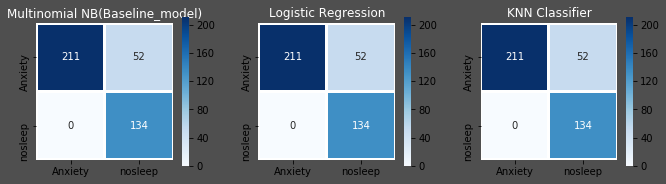

In [70]:
lst    = [pipe0, pipe1, pipe2]

length = len(lst)

mods   = ['Multinomial NB(Baseline_model)','Logistic Regression',
          'KNN Classifier']

fig = plt.figure(figsize=(15,17))
fig.set_facecolor('#4F4F4F')
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(5,4,j+1)
    predictions = i.predict(X_test)
    conf_matrix = confusion_matrix(y_pred,y_test)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["Anxiety","nosleep"],
                yticklabels=["Anxiety","nosleep"],
                linewidths = 2,linecolor = "w",cmap = "Blues")
    plt.title(k,color = "w")
    plt.subplots_adjust(wspace = .3,hspace = .3)

##### Conclusion:
- High level of accuracy were achieved with all three models
     - Models were able to classify which topics belong where based on count vectorizer with at least 95% accuracy
     - High accuracy may also suggest some form of overfitting or that topics are not as related to each other
- A more extensive fine tuning of the data and models may help lower Type 1 Errors 